## Bivariate Clustered Bar Charts

To depict the relationship between **two categorical variables**, we can extend the **univariate bar chart** into a **clustered bar chart**. 

Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. 

In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. 

This is easiest to see with an example, using **seaborn's countplot** function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the **"hue"** argument.

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load data
fuel_econ = pd.read_csv('../../Datasets/fuel_econ.csv')

fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [15]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])

fuel_econ[25:30]

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
25,32249,Kia,Rio,2013,Compact Cars,Front-Wheel Drive,Automatic 6-spd,Regular Gasoline,4,1.6,...,88,28.0,38.7000,36.0,56.500,31.0,291,8,8,Automatic
26,32250,Kia,Rio,2013,Compact Cars,Front-Wheel Drive,Manual 6-spd,Regular Gasoline,4,1.6,...,88,29.0,39.5000,37.0,56.800,32.0,283,8,8,Manual
27,32251,Kia,Rio Eco,2013,Compact Cars,Front-Wheel Drive,Automatic 6-spd,Regular Gasoline,4,1.6,...,88,30.0,40.7278,36.0,56.955,32.0,279,8,8,Automatic
28,32252,Hyundai,Elantra,2013,Midsize Cars,Front-Wheel Drive,Automatic 6-spd,Regular Gasoline,4,1.8,...,96,28.0,37.8169,38.0,56.500,32.0,284,8,8,Automatic
29,32253,Hyundai,Elantra,2013,Midsize Cars,Front-Wheel Drive,Manual 6-spd,Regular Gasoline,4,1.8,...,96,28.0,38.2000,38.0,56.500,32.0,284,8,8,Manual


In [48]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Compact Cars,784,338
Large Cars,605,20
Midsize Cars,989,199
Minicompact Cars,188,133
Subcompact Cars,502,171


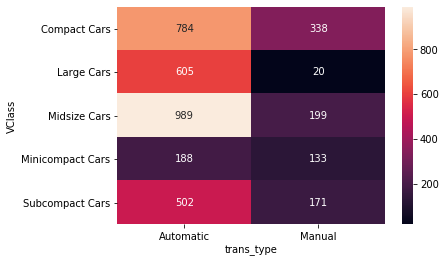

In [49]:
sb.heatmap(ct_counts, annot=True, fmt='d');

**annot = True** makes it so annotations show up in each cell, but the default string formatting only goes to two digits of precision. Adding **fmt = 'd'** means that annotations will all be formatted as integers instead. You can use **fmt = '.0f'** if you have any cells with no counts, in order to account for **NaNs**.

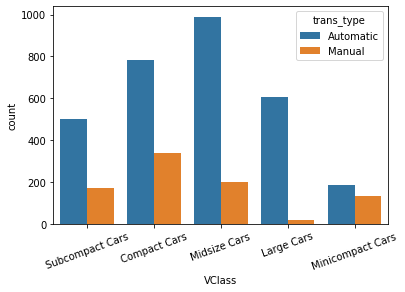

In [47]:
sb.countplot(data=fuel_econ, x='VClass', hue='trans_type');
plt.xticks(rotation=20);